# Import Required Libraries
Import necessary libraries such as TensorFlow, Keras, NumPy, and Matplotlib.

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
import os
from PIL import UnidentifiedImageError


/Users/Thomas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Set Hyperparameters
Define hyperparameters including resolution of image, number of convolution layers, batch size, and epochs.

In [53]:
# Define hyperparameters
image_resolution = (32, 32)  # Resolution of image
num_conv_layers = 5  # Number of convolution layers
batch_size = 32  # Batch size
epochs = 10  # Number of epochs

# Define file paths
train_data_dir = 'concrete_crack_images/training'
test_data_dir = 'concrete_crack_images/test'

# Define categories
categories = ['Negative', 'Positive']


# Load and Preprocess Data
Load images from the local file path, split them into training and test sets, and preprocess them (resize, normalize).

In [46]:
# Function to load images and labels for training data
def load_data_with_error_handling(data_dir, categories, image_resolution):
    images = []
    labels = []
    for category in categories:
        category_path = os.path.join(data_dir, category)
        if not os.path.exists(category_path):
            print(f"Directory {category_path} does not exist.")
            continue
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                img = load_img(img_path, target_size=image_resolution)
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(categories.index(category))
            except UnidentifiedImageError:
                print(f"Cannot identify image file {img_path}. Skipping.")
    return np.array(images), np.array(labels)

# Function to load images for test data
def load_test_data_with_error_handling(data_dir, image_resolution):
    images = []
    if not os.path.exists(data_dir):
        print(f"Directory {data_dir} does not exist.")
        return np.array(images)
    for img_name in os.listdir(data_dir):
        img_path = os.path.join(data_dir, img_name)
        try:
            img = load_img(img_path, target_size=image_resolution)
            img_array = img_to_array(img)
            images.append(img_array)
        except UnidentifiedImageError:
            print(f"Cannot identify image file {img_path}. Skipping.")
    return np.array(images)


In [47]:
# Load training data
X_train, y_train = load_data_with_error_handling(train_data_dir, categories, image_resolution)

# Load test data with labels
X_test = load_test_data_with_error_handling(test_data_dir, image_resolution)

# Print shapes of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")


Training data shape: (32107, 32, 32, 3)
Test data shape: (7893, 32, 32, 3)
Training labels shape: (32107,)


# Build the Convolutional Neural Network (CNN)
Create a CNN model with the specified number of convolution layers.

In [48]:
# Build the Convolutional Neural Network (CNN)

# Define the initial number of filters
initial_filters = 32
dropout_rate = 0.5  # Dropout rate (50% of the units will be dropped)

# Initialize the CNN model
model = Sequential()

# Add convolutional layers based on the specified number of convolution layers
for i in range(num_conv_layers):
    filters = initial_filters * (2 ** i)
    if i == 0:
        # First layer needs to specify input shape
        model.add(Conv2D(filters, (3, 3), activation='relu', padding="same", input_shape=(image_resolution[0], image_resolution[1], 3)))
    else:
        model.add(Conv2D(filters, (3, 3), activation='relu', padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

# Add dropout layer after the fully connected layer
model.add(Dropout(dropout_rate))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 1, 1, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 1, 1, 2048)     │    18,876,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 1, 1, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 1, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,427,009 (97.00 MB)

 Trainable params: 25,427,009 (97.00 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model
Train the CNN model using the training data and specified batch size, and record the computational time.

In [54]:
# Train the Model

# Start the timer
start_time = time.time()

# Train the model with training data
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# End the timer
end_time = time.time()


Epoch 1/10
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1786s 2s/step - accuracy: 0.9943 - loss: 0.0222
Epoch 2/10
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1783s 2s/step - accuracy: 0.9933 - loss: 0.0250
Epoch 3/10
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1803s 2s/step - accuracy: 0.9951 - loss: 0.0167
Epoch 4/10
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1805s 2s/step - accuracy: 0.9944 - loss: 0.0209
Epoch 5/10
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1826s 2s/step - accuracy: 0.9949 - loss: 0.0178
Epoch 6/10
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1808s 2s/step - accuracy: 0.9931 - loss: 0.0273
Epoch 7/10
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1810s 2s/step - accuracy: 0.9959 - loss: 0.0150
Epoch 8/10
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1806s 2s/step - accuracy: 0.9933 - loss: 0.0236
Epoch 9/10
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 6603s 7s/step - accuracy: 0.9963 - loss: 0.0106
Epoch 10/10
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 2105s 2s/step - accuracy: 0.9970 - loss: 0.0108


Training Time: 23135.12 seconds
Hyperparameters:
Image Resolution: (32, 32)
Number of Convolution Layers: 5
Batch Size: 32
Epochs: 10


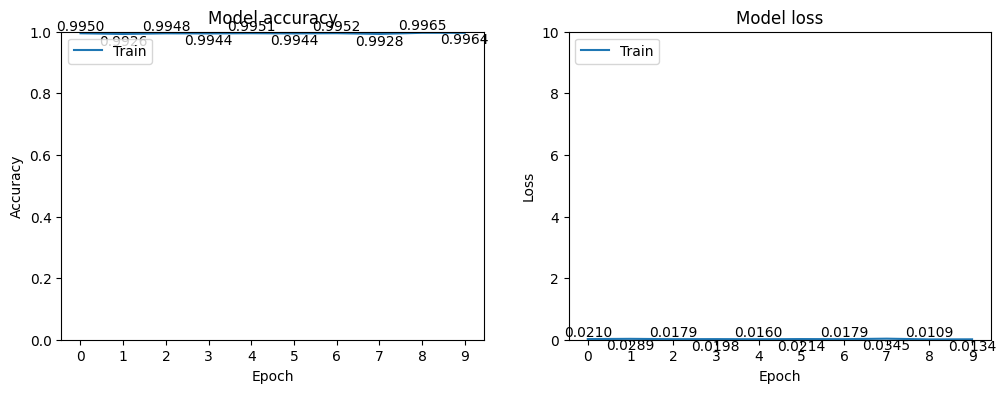

In [55]:
# Calculate the computational time
training_time = end_time - start_time

# Print the computational time
print(f"Training Time: {training_time:.2f} seconds")

# Print hyperparameters information
print(f"Hyperparameters:")
print(f"Image Resolution: {image_resolution}")
print(f"Number of Convolution Layers: {num_conv_layers}")
print(f"Batch Size: {batch_size}")
print(f"Epochs: {epochs}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)  # Set y-axis range for accuracy
plt.xticks(range(epochs))  # Set x-axis ticks to integer values

# Alternate labels above and below the value points
for i, v in enumerate(history.history['accuracy']):
    plt.text(i, v, f"{v:.4f}", ha='center', va='bottom' if i % 2 == 0 else 'top')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0, 10)  # Set y-axis range for loss
plt.xticks(range(epochs))  # Set x-axis ticks to integer values

# Alternate labels above and below the value points
for i, v in enumerate(history.history['loss']):
    plt.text(i, v, f"{v:.4f}", ha='center', va='bottom' if i % 2 == 0 else 'top')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the Model
Evaluate the model using the test data and calculate accuracy.

In [56]:
# # Evaluate the Model

# # Calculate the computational time for evaluation
# evaluation_start_time = time.time()

# # Evaluate the model on the test data
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# evaluation_end_time = time.time()
# evaluation_time = evaluation_end_time - evaluation_start_time

# # Print the computational time for evaluation
# print(f"Evaluation Time: {evaluation_time:.2f} seconds")

# # Print the test accuracy
# print(f"Test Accuracy: {test_accuracy:.2f}")

# # Print the test loss
# print(f"Test Loss: {test_loss:.2f}")


# Display Results
Display the training and test accuracy, and the computational time.

In [57]:
# # Display Results

# # Display the training accuracy
# training_accuracy = history.history['accuracy'][-1]
# print(f"Training Accuracy: {training_accuracy:.4f}")

# # Display the validation accuracy
# validation_accuracy = history.history['val_accuracy'][-1]
# print(f"Validation Accuracy: {validation_accuracy:.4f}")

# # Display the computational time for training
# print(f"Training Time: {training_time:.4f} seconds")

# # Display the computational time for evaluation
# print(f"Evaluation Time: {evaluation_time:.4f} seconds")